In [2]:
import pandas as pd
import matplotlib.pyplot as plt # To create the plot
import seaborn as sns
import numpy as np
%matplotlib inline

#import plotly.express as px 

### Read the dataset after preprocessing

In [3]:
tadawul_stuks = pd.read_csv('Tadawul_stcks_clean.csv')

In [4]:
# look frist five rows 
tadawul_stuks.head()

,trading_name,sector,date,open_price,high_price,low_price,close_price,change,perc_Change,volume_traded,value_traded,num_trades,Year,month,day,Change_category
0,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0,2020,March,Thursday,Bad Change
1,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0,2020,March,Wednesday,Good Change
2,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0,2020,March,Tuesday,Good Change
3,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0,2020,March,Monday,Bad Change
4,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0,2020,March,Sunday,Bad Change


# EDA

- 1st plot insights: 

Pie plot : This plot shows that most of the trading companies are from the financial and materials sectors.

<AxesSubplot:title={'center':'Propotion of trading names in the sectors'}, ylabel='sector'>

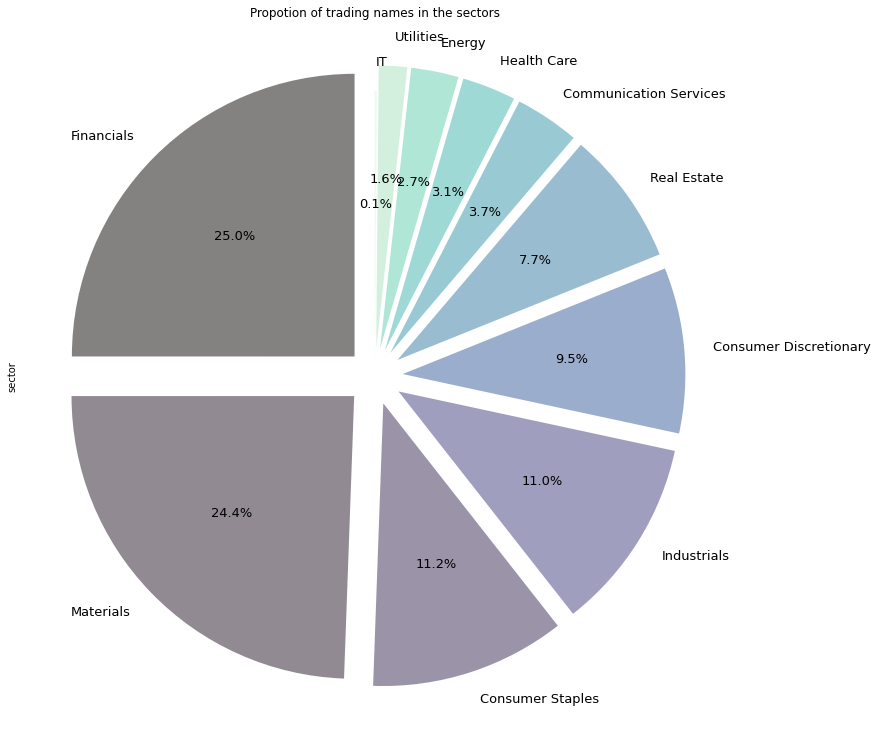

In [4]:
#parameters for the pie plot
kwargs = dict(
    startangle = 90,
    #color palette mako
    colormap   = 'mako',
    #size of font 13
    fontsize   = 13,
    explode    = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.01),
    figsize    = (100,13),
    autopct    = '%1.1f%%',
    wedgeprops ={'alpha':0.5},
    #title of plot
    title      = "Propotion of trading names in the sectors")

#create the plot in the sector column
tadawul_stuks['sector'].value_counts().plot.pie(**kwargs)

- second plot insights: 

Line plot: This plot shows the number of trades for each sector in each year. As shown that the number of trades got increased in 2006, especially in the Real Estate and Utilities sectors.

Text(0.5, 1.0, 'Number of trades for each sector')

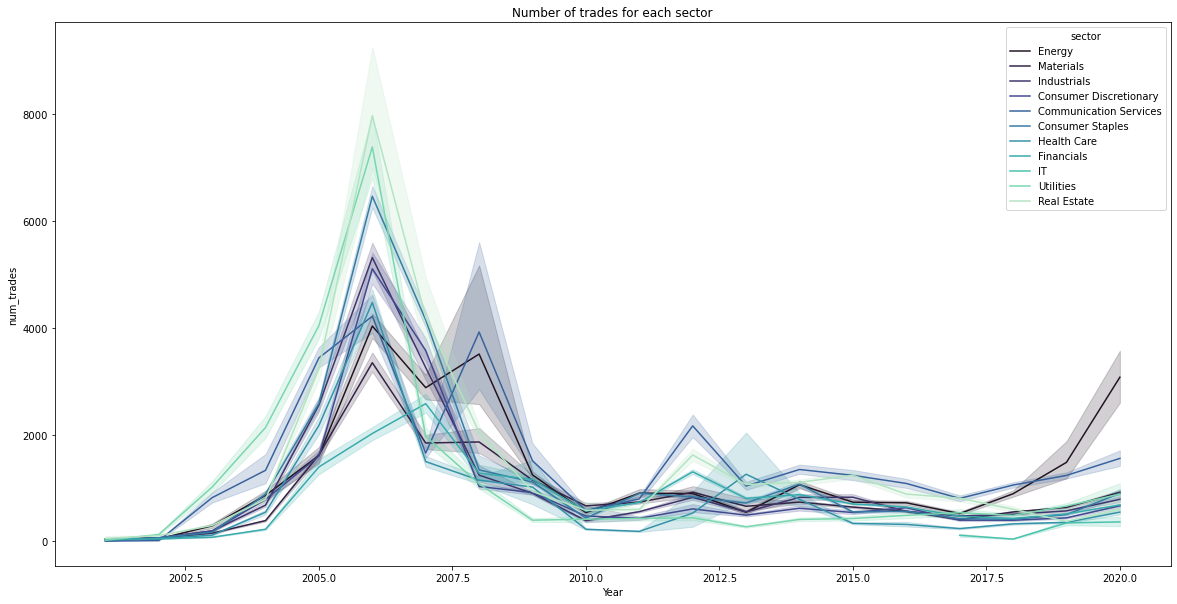

In [5]:
#color = 'mako'
plt.subplots(figsize=(20,10)) 
sns.lineplot(data = tadawul_stuks,
             #x years from 2001-2020
             x="Year",
             #number of trade for each sector
             y="num_trades",
             #name of sector
             hue="sector",
             #palette color for plot
            palette='mako')
plt.title('Number of trades for each sector')

- 3rd plot insights: 

These two plots show the Close and Open prices in the largest sector (Financial sector):

**close_price and open_price in Bupa Arabia for Cooperative Insurance**
- The higher median in 2020, then in 2019 lastly 2018
- The highest variation in 2019, then 2018 lastly 2020
- No outliers

**close_price and open_price in the company for Cooperative Insurance**
- The highest median in 2020, then in 2019 lastly 2018
- The highest variation in 2019 then 2018 lastly 2020
- 2020 has outliers in the open and close prices

**close_price and open_price in Alrajhi**
- The highest median in 2020, then 2018 lastly 2019
- The highest variation in 2018, then 2019 lastly 2020
- No outliers

**close_price and open_price in National Commercial Bank**
- The highest median in 2019, then 2018 lastly 2020
- The highest variation in 2019, then 2018 lastly 2020
- There is an outlier in the open price in 2020

In [33]:
#copy df to result dataframe for only the best sector and years from 2018-2020  
result=tadawul_stuks.loc[(tadawul_stuks['sector']=='Financials') & (tadawul_stuks['Year']> 2017)]
#sort by highest price and show only 2000 sample
result=result.sort_values(by='high_price', ascending=False, na_position='first').head(2000)

Text(0.5, 1.0, 'open  price for Financials sector')

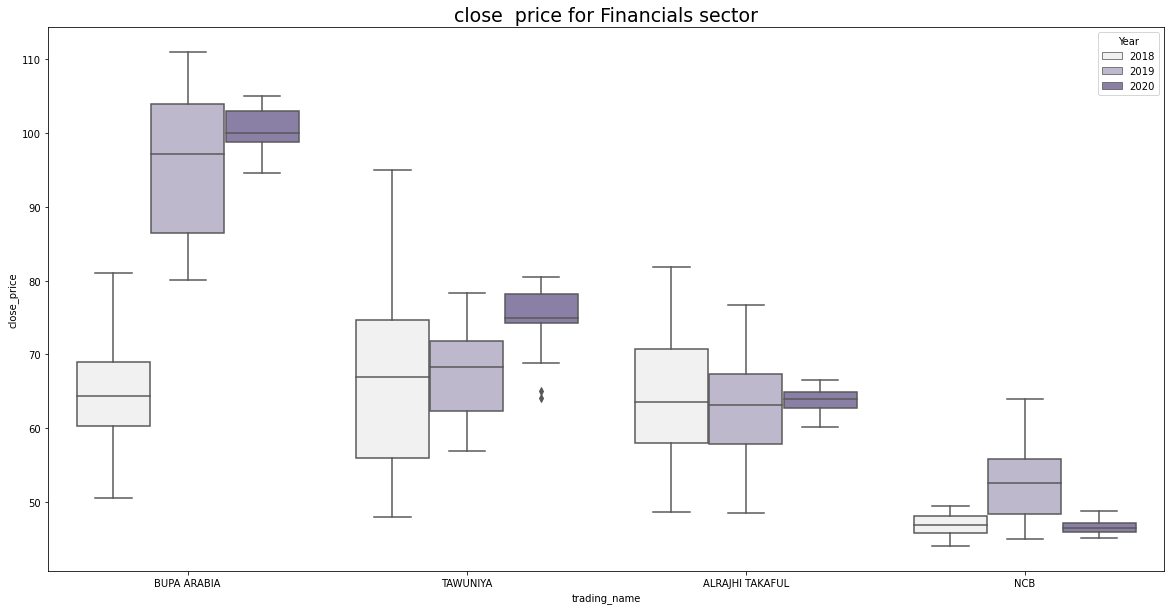

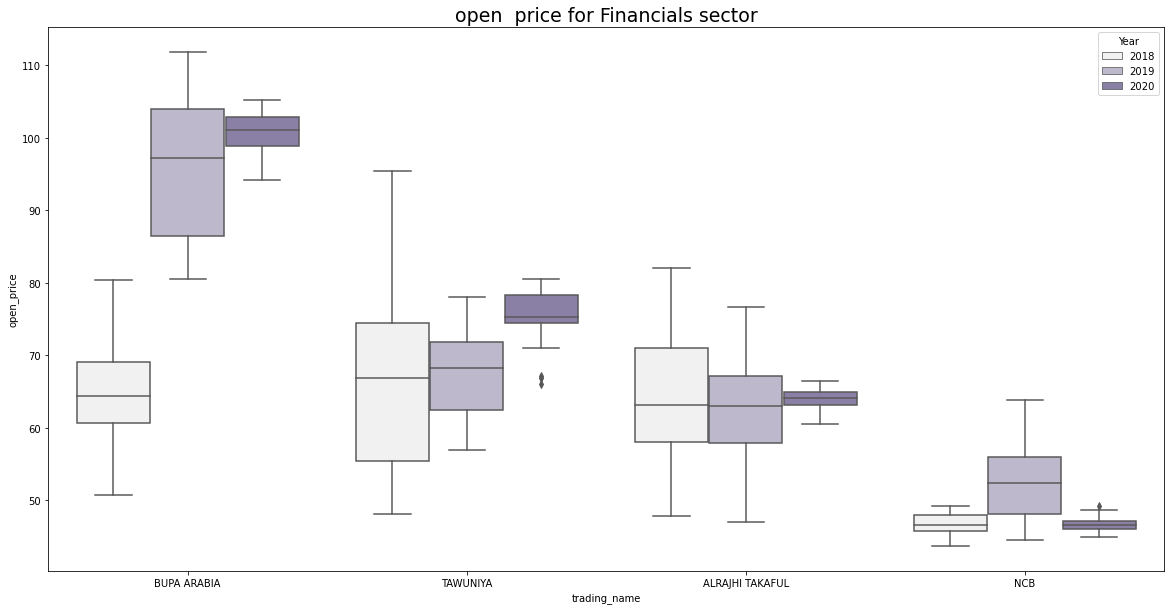

In [40]:
# x axise hold trading_name
xh = result['trading_name']

fig, ax1 = plt.subplots(figsize =(20, 10)) #size of fig
sns.boxplot(ax = ax1, y = result['close_price'],  #y is colse price for each trading name
                  x = xh, hue=result['Year'],color="#877aab") #  Purple Gray Color Palette


fig, ax2 = plt.subplots(figsize =(20, 10)) 
sns.boxplot(ax = ax2, y = result['open_price'],  #y is open price for each trading name
                  x = xh, hue=result['Year'],color="#877aab") # hue by years (2018,2019,2020)

ax1.set_title('close  price for Financials sector',fontsize=19)#title size
ax2.set_title('open  price for Financials sector',fontsize=19)

In [ ]:
#copy df to result2 dataframe for only the lowest sector and years from 2018-2020  

result2=tadawul_stuks.loc[(tadawul_stuks['sector']=='IT') & (tadawul_stuks['Year']> 2017)]
#sort by highest price and show only 2000 sample

result2=result2.sort_values(by='high_price', ascending=False, na_position='first').head(2000)

- 3rd plot insights continued:

These two plots show the Close and Open prices in the largest sector Information Technology ( IT ) sector:

**close_price and open_price in 2019 al Moammar information systems**
- The highest median in 2019, then 2020
- The highest variation in 2019, then 2020
- Close price in 2020 has outliers
- Non-existent in 2018

**close_price and open_price in Arab sea information systems**
- The highest median in 2020, then 2019 lastly 2018
- The highest variation in 2020, then 2019 lastly 2018
- There are outliers in 2019 in the open and close prices

Text(0.5, 1.0, 'close  price for IT sector')

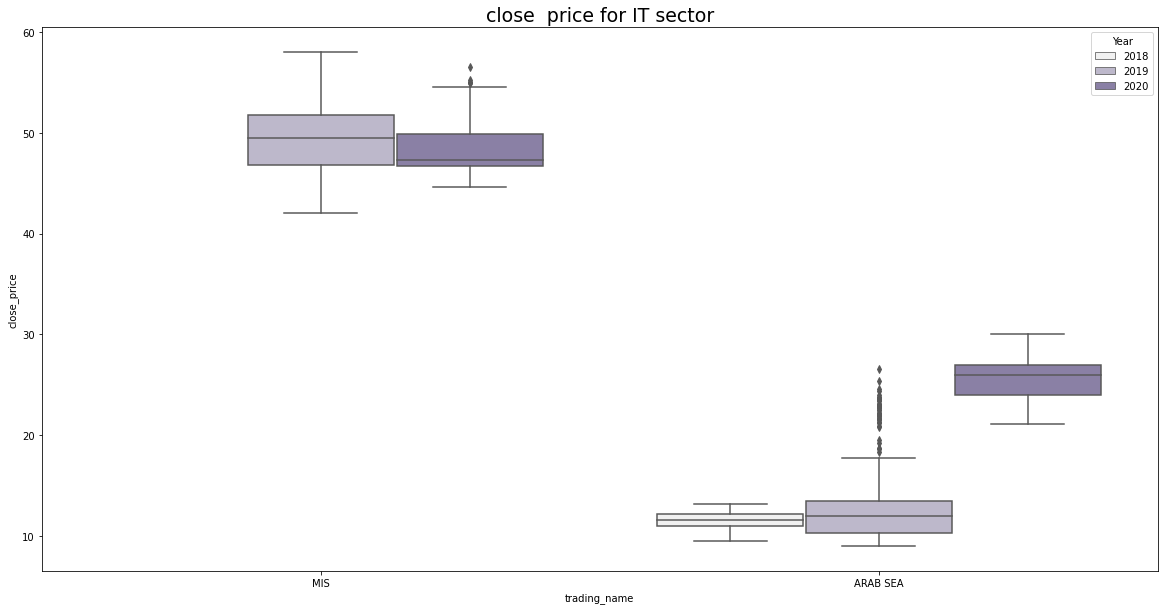

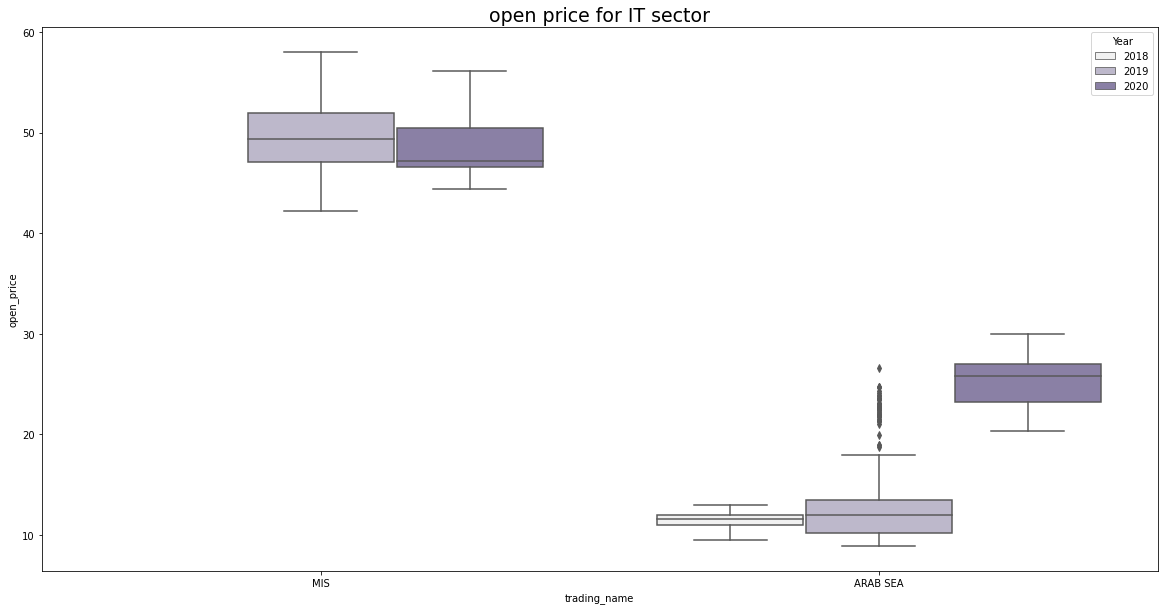

In [38]:
xh = result2['trading_name']# the lowest 

fig, ax1 = plt.subplots(figsize =(20, 10)) #size of fig
sns.boxplot(ax = ax1, y = result2['close_price'],  #y is colse price for each trading name
                  x = xh, hue=result2['Year'],color="#877aab") #  Purple Gray Color Palette


fig, ax2 = plt.subplots(figsize =(20, 10)) 
sns.boxplot(ax = ax2, y = result2['open_price'],  #y is open price for each trading name
                  x = xh, hue=result2['Year'],color="#877aab") #  Purple Gray Color Palette
ax2.set_title('open price for IT sector',fontsize=19)#title size
ax1.set_title('close  price for IT sector',fontsize=19)

- 4th plot insights:

Bar plot: 
- This plot shows that the stock prices increase from 2001–2006
- The stock prices fell in 2007.
- The stock prices stable from 2016–2020

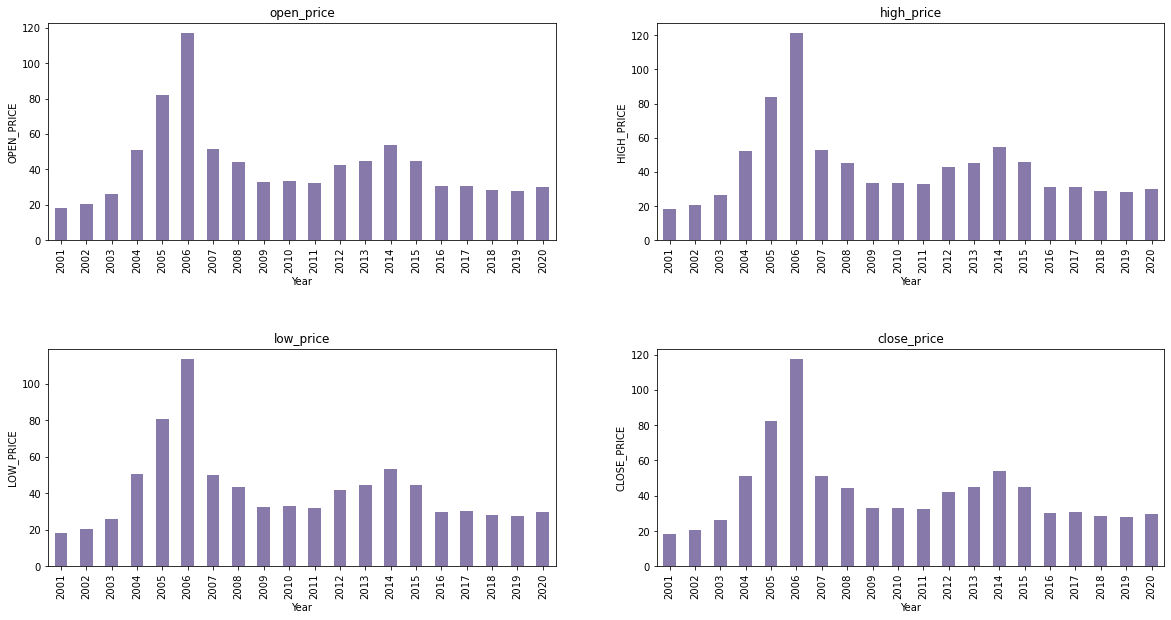

In [8]:
#create copy of tadawul_stuks to group years 
data_grouped = tadawul_stuks.groupby('Year').mean()
plt.subplots(figsize=(20,10)) #size of fig
plt.subplots_adjust(hspace=0.5) #space between plots

# show prices for each e
 
for i, col in enumerate(['open_price', 'high_price', 'low_price', 'close_price']):#columns
    plt.subplot(2,2,i+1)#2 plot in each row
    data_grouped[col].plot.bar(color="#877aab") #Purple  Color 
    plt.title(col)# title for rach plot
    plt.ylabel(col.upper(),fontsize=10)#size for font in each plot


plt.show()

- 5th plot insights:

Pie plot: This plot shows that the Bad Changes class has the highest proportion of the overall changes (45.41%), while the Stable class has the lowest proportion (11.34%). Nonetheless, the Good change class is extremely close to the Bad change class, with a proportion of (43.26%).

Text(0.5, 1.0, 'Change category ')

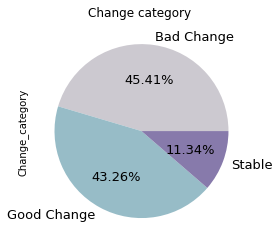

In [11]:
#colors list
colors = ['#CCC9D0','#97BCC7',"#877aab"]
#count values for each category , size for font is 14 , autopct : round it by 2 number
Change_category_plot = (tadawul_stuks['Change_category'].value_counts()).plot.pie( colors=colors,fontsize = 13, autopct='%.2f%%')
Change_category_plot.set_title('Change category ', fontsize = 12)

- 6 plot insights:
    
Count plot: This plot shows that all sectors are close in terms of good or bad changes, while the Stable class is the lowest across all sectors.

Text(0.5, 1.0, 'Change category for sector')

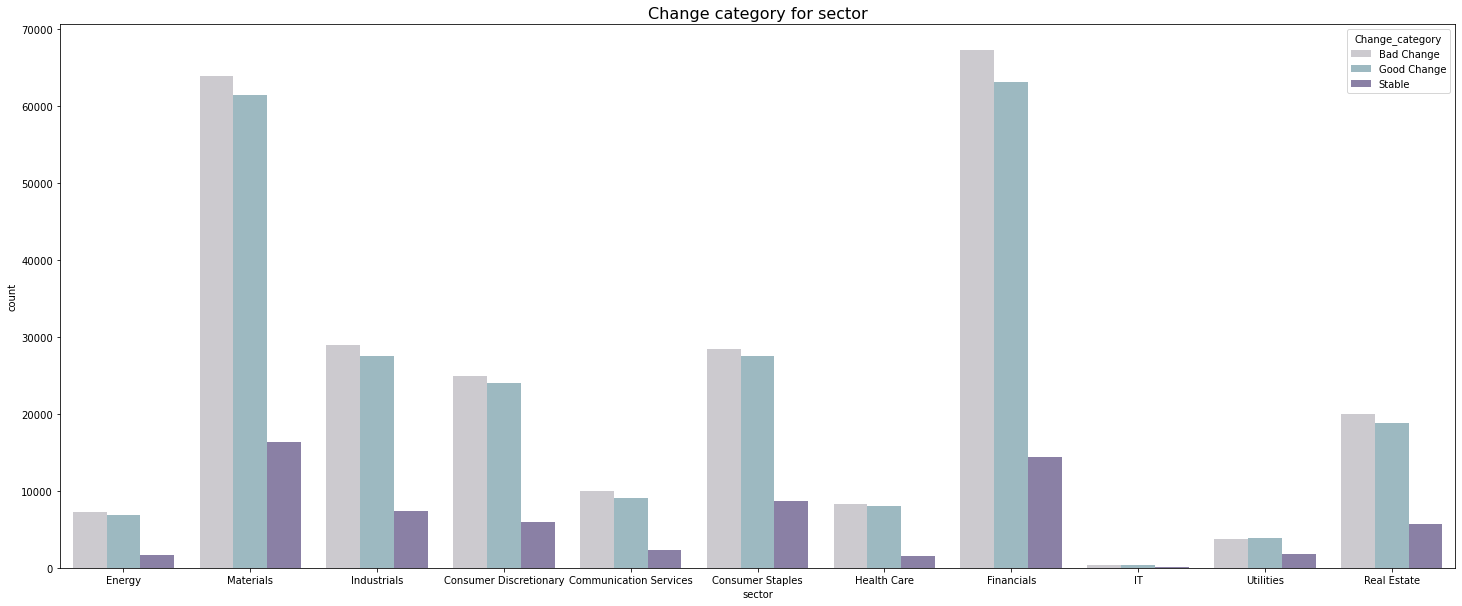

In [6]:

plt.figure(figsize=(25,10))# size 
# hue each sector with Change_category
Change_category_plot=(sns.countplot(x='sector', hue='Change_category' ,data = tadawul_stuks,palette=['#CCC9D0','#97BCC7',"#877aab"]))#palette :color list
Change_category_plot.set_title('Change category for sector',fontsize=16)


- 7 plot insights:

KDE plot: These two plots show us the closing price density for the largest sector companies (only the best 2 companies in terms of the closing price) and the lowest sector companies.
- IT: MIS has the highest density when the close price is almost 13, where ARAB SEA has the highest density when the close price is almost 46.
- Financial: RIBL has the highest density when the close price is almost 12, whereas SAMBA has the highest density when the close price is almost 23.

In [ ]:
(tadawul_stuks["sector"]=="IT")

Text(0.5, 1.0, 'Distribution of close_price for top 2 corporation in Financials sector')

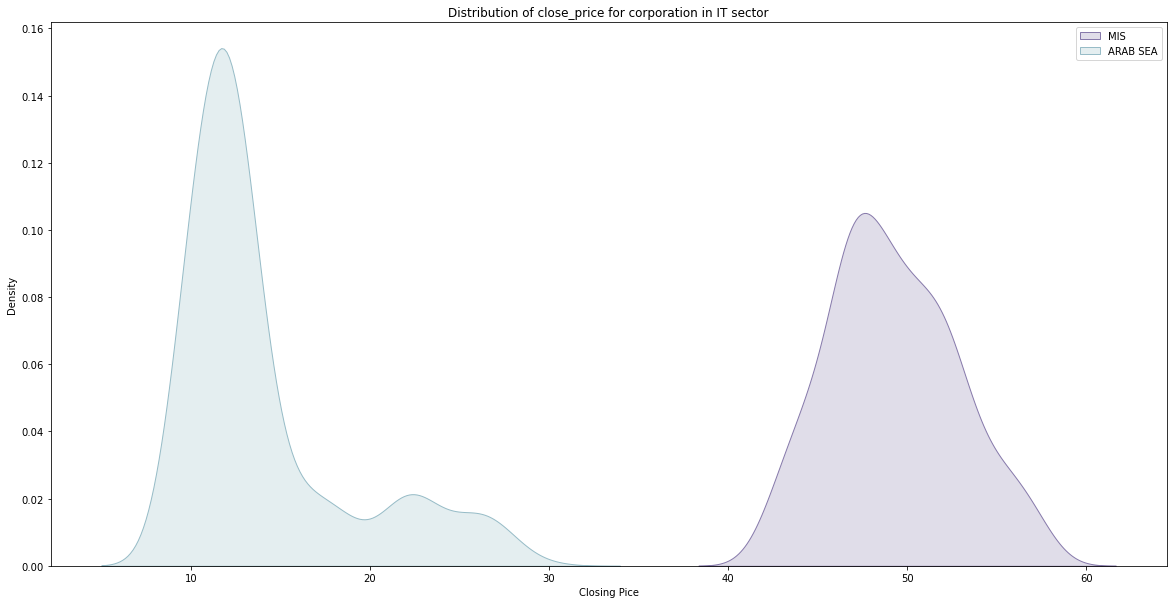

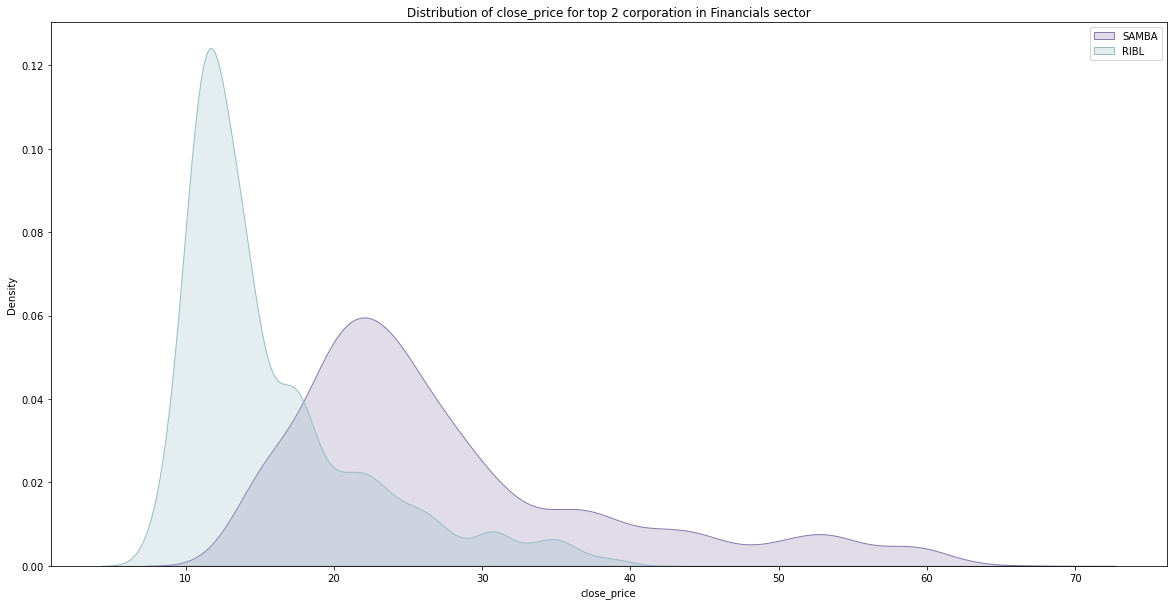

In [43]:
fig, ax = plt.subplots(figsize =(20, 10))# size for plot
IT = sns.kdeplot(tadawul_stuks.close_price[(tadawul_stuks["trading_name"] == 'MIS') ],shade= True,  color='#877aab')
IT = sns.kdeplot(tadawul_stuks.close_price[(tadawul_stuks["trading_name"] == 'ARAB SEA') ], shade= True,  color='#97BCC7')
IT.set_ylabel('Density')
IT.set_xlabel('Closing Pice')
IT.legend(["MIS","ARAB _"],loc='upper right')# name of legend and location of legend
IT.set_title('Distribution of close_price for corporation in IT sector')#title for plot

fig, ax1 = plt.subplots(figsize =(20, 10))# size for plot
Financials = sns.kdeplot(tadawul_stuks.close_price[(tadawul_stuks["trading_name"] == 'SAMBA') ],shade= True,  color='#877aab')
Financials = sns.kdeplot(tadawul_stuks.close_price[(tadawul_stuks["trading_name"] == 'RIBL') ], shade= True,  color='#97BCC7')
IT.set_ylabel('Density')
IT.set_xlabel('Closing Pice')
Financials.legend(['SAMBA', 'RIBL'])# name of legend 
Financials.set_title('Distribution of close_price for top 2 corporation in Financials sector')#title for plot


- 8 plot insights:

Bar plot: This plot shows the number of trades on weekdays. We notice that the number of trades increases at the start of the investment market on Saturday, while it decreases at the end of the week on Thursday.

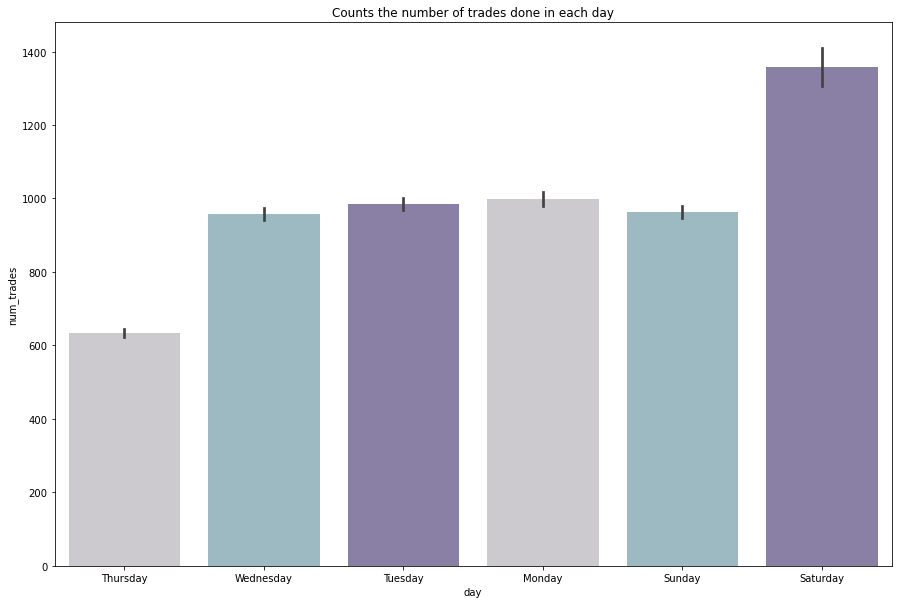

In [291]:
plt.figure(figsize = (15, 10))#size
sns.barplot( data = tadawul_stuks ,
            x = 'day', # day in week
            y = 'num_trades',palette = ['#CCC9D0','#97BCC7',"#877aab"])#color list
plt.title("Counts the number of trades done in each day")#title of plot
plt.show()

- 8 plot insights continued:

Bar plot: This plot shows the number of trades in the months. We notice that the number of trades is close in the first and last months of the year, while it varies throughout the rest of the year.

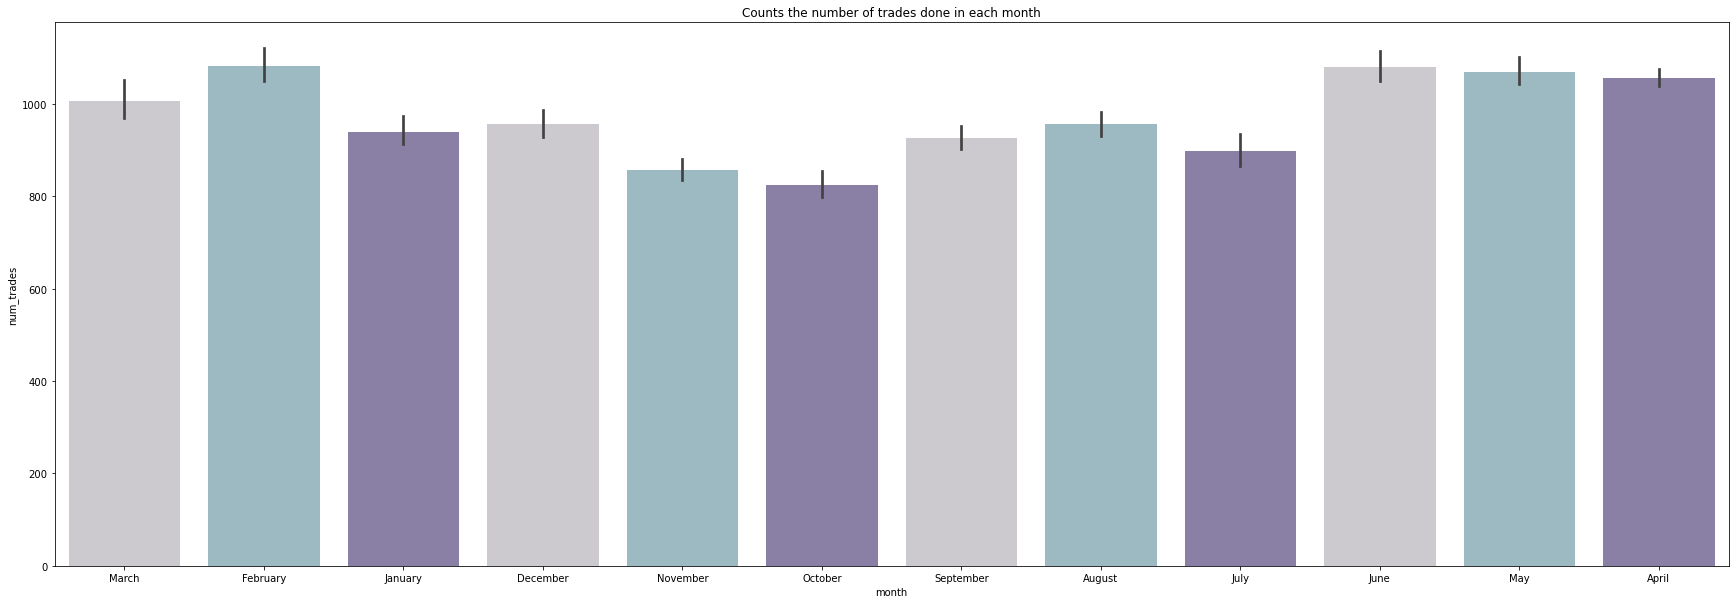

In [300]:
plt.figure(figsize = (30, 10))#fig size
sns.barplot( data = tadawul_stuks ,
            x = 'month', #month in year 
            y = 'num_trades',palette = ['#CCC9D0','#97BCC7',"#877aab"])#color list 
plt.title("Counts the number of trades done in each month")#title of plot
plt.show()

   - 9 plot insights:

Pair plot: This plot shows multiple insights as follow:
- Trade distribution Rises each year but in 2020 it is broken down
- We can see one peak in open price, high price, low price, and close_price which means the data has no varied regions, And the Volume data is right-skewed.
- The highest price in open_price, high_price, low_price, close_price is more than 6000
- The lowest price in open_price, high_price, low_price, close_price is 0
- We can see all the relationships on daily returns between all the features. A simple glance shows an interesting correlation between close price and open, high and low price daily returns.
- The highest change (Good Change) is almost 600
- The worst change (Bad Change) is -400
- We notice that the good and bad changes are almost similar.

<Figure size 1008x360 with 0 Axes>

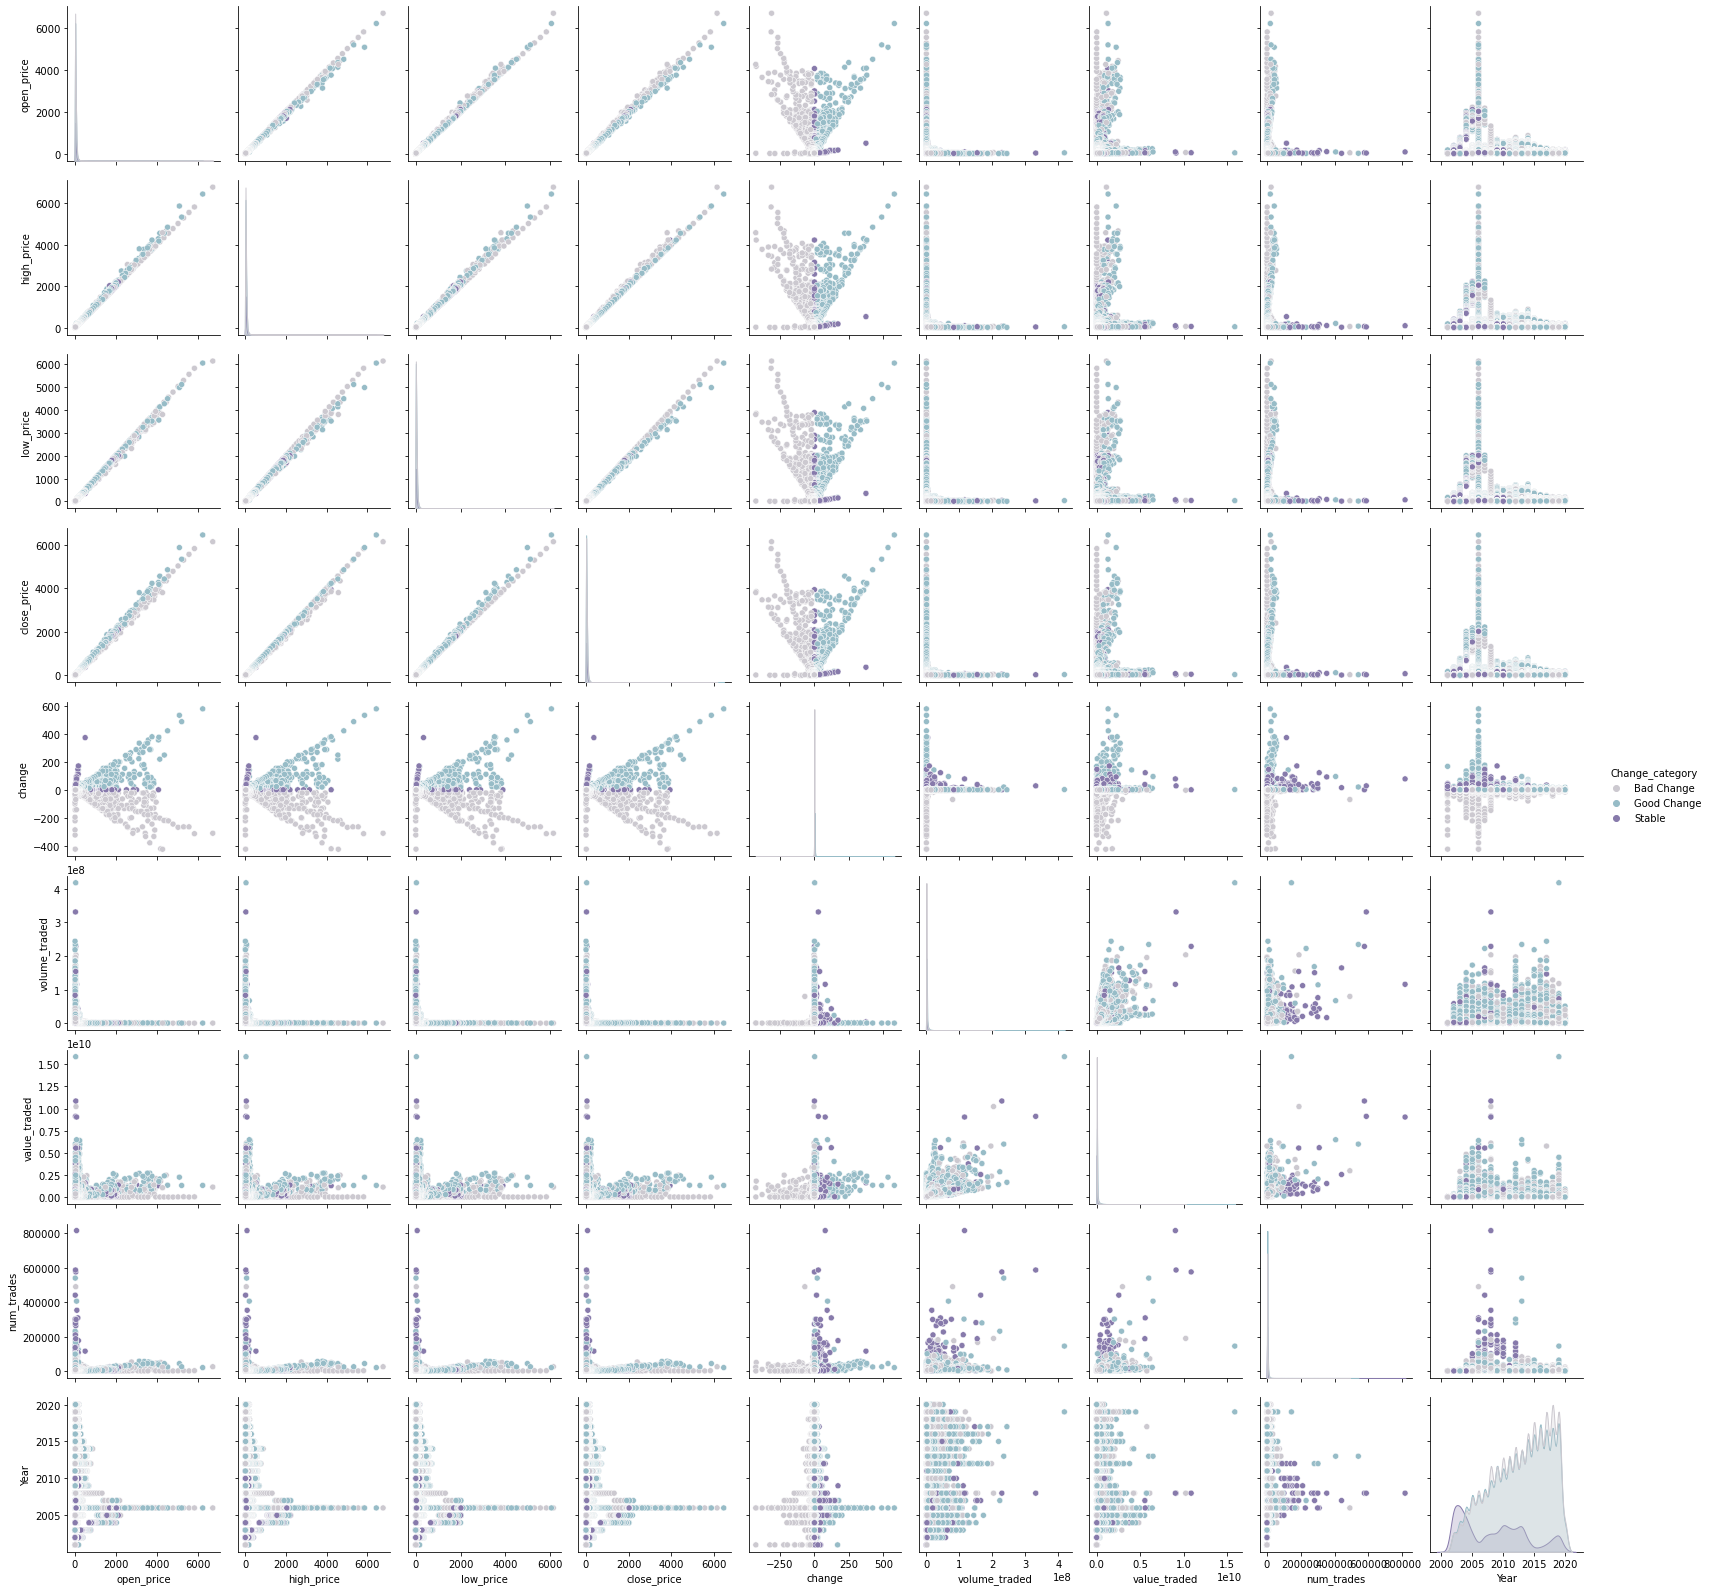

In [12]:
#create a copy of dataframe with selected coloumns 

tadawul_stuks2 = tadawul_stuks.drop(['trading_name','sector','date' ,'perc_Change'], axis = 1)
plt.figure(figsize=(14, 5))#fig size
sns.pairplot(tadawul_stuks2, hue='Change_category', palette = ['#CCC9D0','#97BCC7',"#877aab"])#color list
plt.title('')
plt.show()

- 10 plot insights:

The Predictive Power Score (PPS) plot: is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns.
This plot shows high relationships between open_price, high_price, low_price, with our regression target (clos_price)

Text(0.5, 1.0, 'heatmap ')

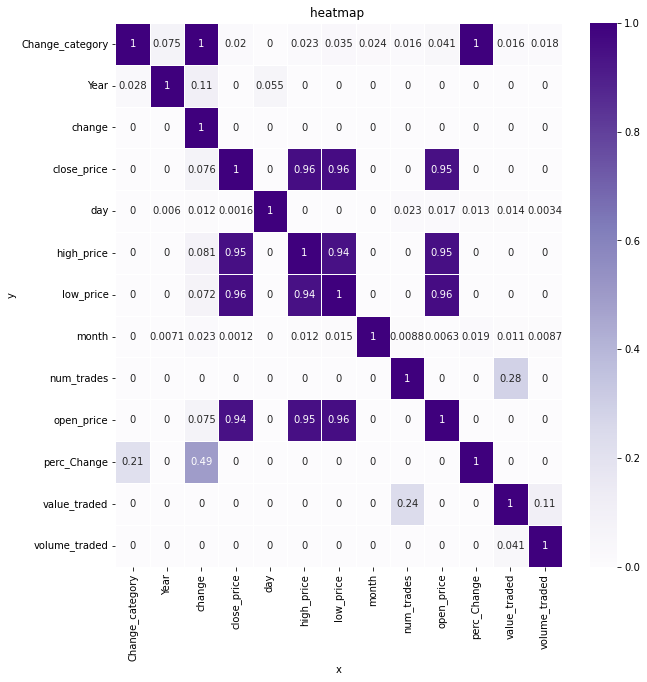

In [7]:
import ppscore as pps
from sklearn.metrics import plot_confusion_matrix
#copy of df to select numbric coloumns
dd = tadawul_stuks.drop(['trading_name','sector','date' ], axis = 1)
x =['open_price', 'high_price', 'low_price', 'perc_Change','volume_traded','value_traded','num_trades','Year']
y=dd["close_price"]
pps.matrix(dd)

c=pps.matrix(dd)
c
fig, ax = plt.subplots(figsize=(10, 10))#fig size
matrix_df = pps.matrix(dd)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Purples", linewidths=0.5, annot=True)
ax.set_title('heatmap ')
